In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
url_f = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url_w = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

df_f = pd.read_csv(url_f, sep=',')
df_w = pd.read_csv(url_w, sep=',')

In [48]:
df_f.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [49]:
df_w.head(10)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


## Let's establish the dependence of delays on the weather:

## 1. Dependence of departue dellays on temperature

In [50]:
weather = df_f.merge(df_w, on = ['year', 'month', 'day', 'hour', 'origin'], how = 'inner' )
temperature = pd.DataFrame(weather.groupby('temp')['dep_delay'].mean())
temperature.sort_index()
temperature = temperature.drop(labels = [temperature.index[-1]])
temperature.head(10)

,dep_delay
temp,
10.94,22.727273
12.02,9.330508
12.92,10.023810
14.00,7.411111
15.08,4.968750
15.98,19.377358
17.06,13.900000
17.96,11.412429
19.04,9.444109


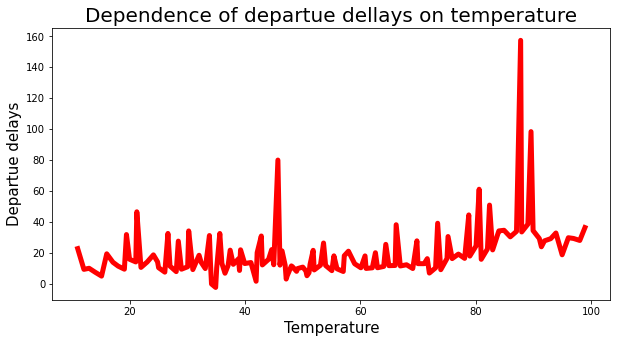

In [51]:
plt.figure(figsize = (10,5))
plt.plot(temperature.index, temperature, c = 'r', linewidth = 5)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Departue delays', size = 15)
plt.title('Dependence of departue dellays on temperature', size = 20)
plt.show()

### Result: Departue delays depend on temperature insignificantly

## 2. Dependence of departue delays on humid

In [52]:
weather = df_f.merge(df_w, on = ['year', 'month', 'day', 'hour', 'origin'], how = 'inner' )
hum = pd.DataFrame(weather.groupby('humid')['dep_delay'].mean())
hum.sort_index()
hum = hum.drop(labels = [hum.index[-1]])
hum.head(10)

,dep_delay
humid,
13.95,18.625000
14.65,11.000000
15.24,2.812500
15.26,0.923077
15.61,57.909091
15.68,78.000000
16.15,8.522727
16.19,42.764706
16.22,71.000000


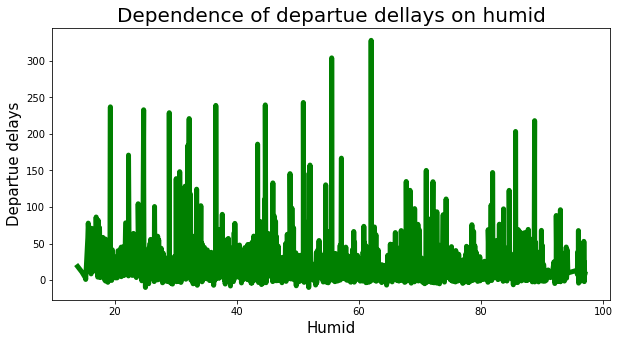

In [53]:
plt.figure(figsize = (10,5))
plt.plot(hum.index, hum, c = 'g', linewidth = 5)
plt.xlabel('Humid', size = 15)
plt.ylabel('Departue delays', size = 15)
plt.title('Dependence of departue dellays on humid', size = 20)
plt.show()

### Result: Departue delays don't depend on humid

## 3. Dependence of departue delays on wind speed

In [54]:
weather = df_f.merge(df_w, on = ['year', 'month', 'day', 'hour', 'origin'], how = 'inner' )
wind = pd.DataFrame(weather.groupby('wind_speed')['dep_delay'].mean())
wind.sort_index()
wind = wind.drop(labels = [wind.index[-1]])
wind.head(10)

,dep_delay
wind_speed,
0.00000,9.350959
3.45234,8.682497
4.60312,10.692525
5.75390,11.981188
6.90468,14.610815
8.05546,13.499406
9.20624,16.242392
10.35702,14.660800
11.50780,17.247731


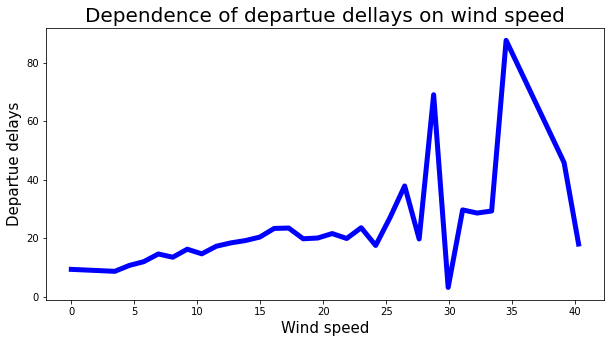

In [55]:
plt.figure(figsize = (10,5))
plt.plot(wind.index, wind, c = 'b', linewidth = 5)
plt.xlabel('Wind speed', size = 15)
plt.ylabel('Departue delays', size = 15)
plt.title('Dependence of departue dellays on wind speed', size = 20)
plt.show()

### Result: Departue delays increases with the increase of wind speed

## 4. Dependence of departue delays on wind directory

In [56]:
weather = df_f.merge(df_w, on = ['year', 'month', 'day', 'hour', 'origin'], how = 'inner' )
direc = pd.DataFrame(weather.groupby('wind_dir')['dep_delay'].mean())
direc.sort_index()
direc = direc.drop(labels = [direc.index[-1]])
direc.head(10)

,dep_delay
wind_dir,
0.0,9.350959
10.0,8.894737
20.0,8.879881
30.0,14.501461
40.0,20.495408
50.0,22.332917
60.0,18.670923
70.0,18.454046
80.0,23.302260


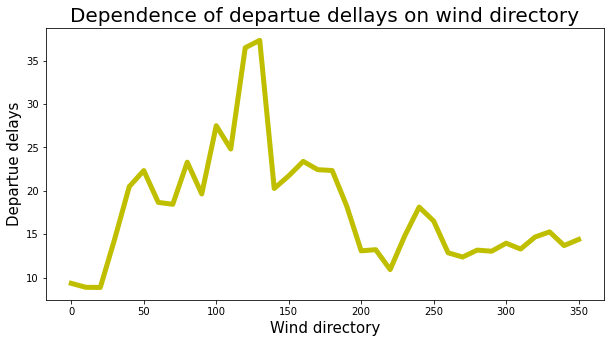

In [57]:
plt.figure(figsize = (10,5))
plt.plot(direc.index, direc, c = 'y', linewidth = 5)
plt.xlabel('Wind directory', size = 15)
plt.ylabel('Departue delays', size = 15)
plt.title('Dependence of departue dellays on wind directory', size = 20)
plt.show()

### Result: Wind directory depends on departue delays

### General result: Some weather characteristics affect on departue delays, but we we can't get rid of it. But we can improve staff work in certain days

## Let's establish the dependence of delays on different time characteristic:

## 5. Let's look at the quantity of flights each month: 

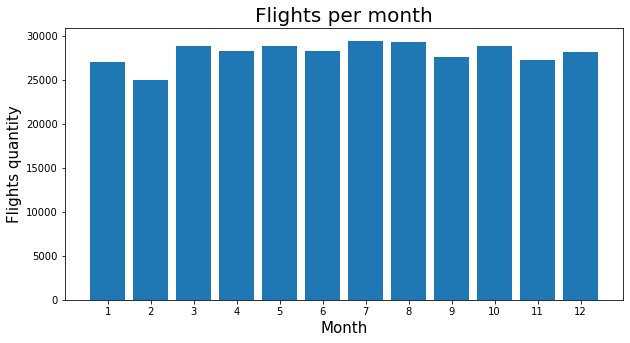

In [58]:
month_flights = df_f.groupby('month')['Unnamed: 0']
sum_fl = month_flights.count() 
ind = [f'{i+1}' for i in range(12)]

plt.figure(figsize = (10,5))
plt.bar(ind, sum_fl)
plt.xlabel('Month', size = 15)
plt.ylabel('Flights quantity', size = 15)
plt.title('Flights per month', size = 20)
plt.show()

### Resilt: The quantity of flights each month is approximately the same. Therefore, delays don't depend on quantity of flights

## 6.  Dependence of delays on company:

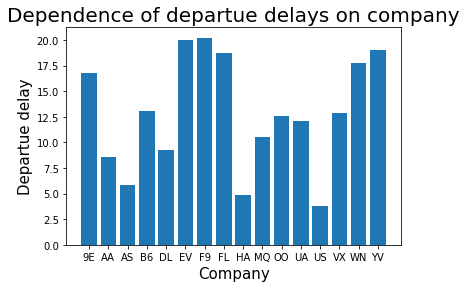

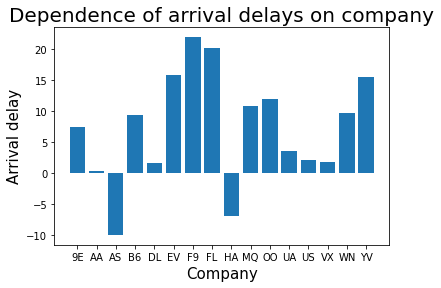

In [78]:
comp_1 = df_f.groupby(['carrier'])['dep_delay'].mean()
comp_2 = df_f.groupby(['carrier'])['arr_delay'].mean()

plt.figure(figsize = (6,4))
plt.bar(comp_1.index, comp_1)
plt.xlabel('Company', size = 15)
plt.ylabel('Departue delay', size = 15)
plt.title('Dependence of departue delays on company', size = 20)
plt.show()

plt.figure(figsize = (6,4))
plt.bar(comp_2.index, comp_2)
plt.xlabel('Company',size = 15)
plt.ylabel('Arrival delay', size = 15)
plt.title('Dependence of arrival delays on company', size = 20)
plt.show()

 ### Result: The most responsible companies are AS, HA, US. The most irresponsible are EV, F9, FL, YV


## 7.  Dependence of delays on airport:

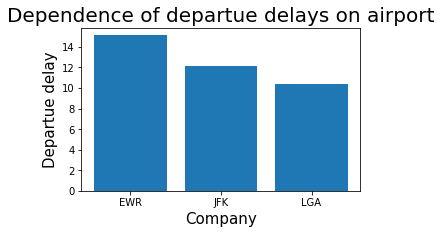

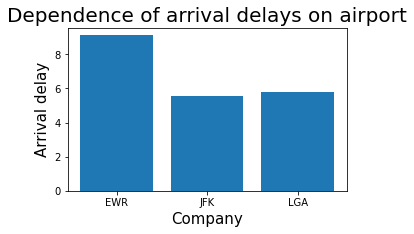

In [74]:
air_1 = df_f.groupby(['origin'])['dep_delay'].mean()
air_2 = df_f.groupby(['origin'])['arr_delay'].mean()

plt.figure(figsize = (5,3))
plt.bar(air_1.index, air_1)
plt.xlabel('Company', size = 15)
plt.ylabel('Departue delay', size = 15)
plt.title('Dependence of departue delays on airport', size = 20)
plt.show()

plt.figure(figsize = (5,3))
plt.bar(air_2.index, air_2)
plt.xlabel('Company',size = 15)
plt.ylabel('Arrival delay', size = 15)
plt.title('Dependence of arrival delays on airport', size = 20)
plt.show()

### Result: Most of the delays occur at EWR. Therefore, they should increase a number of staff

## 8. Dependence of arrival delays on air time:

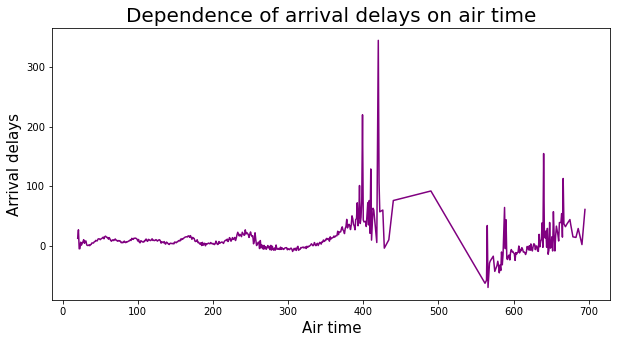

In [75]:
delay = df_f.dropna(subset = ['arr_delay'])
delay = delay.groupby('air_time')['arr_delay'].mean()

plt.figure(figsize = (10,5))
plt.plot(delay.index, delay, c='purple')
plt.xlabel('Air time', size = 15)
plt.ylabel('Arrival delays', size = 15)
plt.title('Dependence of arrival delays on air time', size = 20)
plt.show()

### Result: Arrival delays increases with the increase of air time, but we can't upgrade it

## 9.  Dependence of departue delays on time of day:

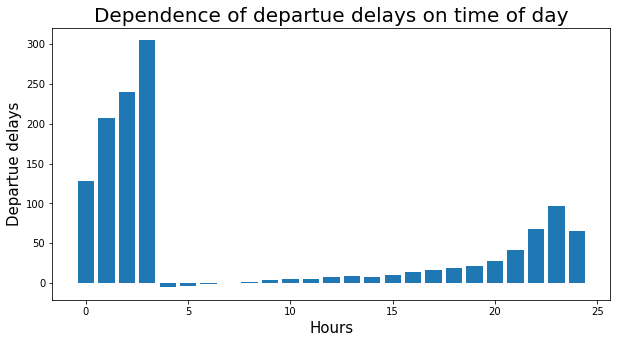

In [76]:
hours = df_f.groupby(['hour'])['dep_delay'].mean()

plt.figure(figsize = (10,5))
plt.bar(hours.index, hours)
plt.xlabel('Hours', size = 15)
plt.ylabel('Departue delays', size = 15)
plt.title('Dependence of departue delays on time of day', size = 20)
plt.show()

### Result: Most of the delays occur between 0 and 3 AM

## 10. Dependence of departue delays on month:

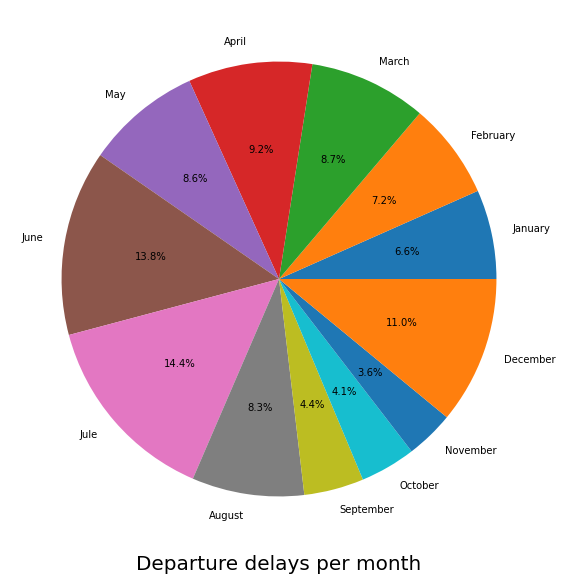

In [77]:
mon = df_f.groupby('month')
delay = mon['dep_delay'].mean()

label = ['January', 'February', 'March', 'April', 'May', 'June', 'Jule', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize = (10,10))
plt.pie(delay, labels = label, autopct = '%1.1f%%')
plt.xlabel('Departure delays per month', size = 20)
plt.show()

### Result: Most of the delays occur in summer and in December